# Cleaning

**We have cleaned the following in the given dataset membership.csv :**
- Invalid dates
- Dropping duplicates
- Null or missing values
- Check for 0 or negative price values

**We have done the following for improved readability :**
- Rename Clients
- Rename ContactIds

**Insights**
- A person (ContactId) can be a member of two different products at the same time.

In [30]:
# Imports
import pandas as pd

# ImpexiumInsights is the membership data
df = pd.read_csv('membership.csv')
df.head(5)

# Change clients to a more readable format as the following:
# Client_1 -> ICSC
# Client_2 -> SIOR
# Client_3 -> NAIOP
df['Client'] = df['Client'].replace('Client_1', 'ICSC')
df['Client'] = df['Client'].replace('Client_2', 'SIOR')
df['Client'] = df['Client'].replace('Client_3', 'NAIOP')
df.head(10)

,ContactId,ClientId,Client,ProductId,ProductType,EffectiveDate,ExpireDate,Total
0,0x566B63D73878FD95925F7B6716FAB095,0xCAB892266CB7872B20CED441410BFF5E,SIOR,0x9E8B160226C9FE22A910C782CE5076E2,Membership,9/1/21,8/31/22,104.49
1,0x77D707DC7112E8379C27E3A1AF0EC034,0xCAB892266CB7872B20CED441410BFF5E,SIOR,0x9E8B160226C9FE22A910C782CE5076E2,Membership,8/1/21,7/31/22,104.49
2,0xC36639462513FE7C2413AF7449B281BD,0xCAB892266CB7872B20CED441410BFF5E,SIOR,0xCF82E756F655A4E1518567DCDB80CCBF,Membership,6/27/21,6/26/22,36.45
3,0xC36639462513FE7C2413AF7449B281BD,0xCAB892266CB7872B20CED441410BFF5E,SIOR,0x9E8B160226C9FE22A910C782CE5076E2,Membership,6/19/21,6/18/22,104.49
4,0xBDF36B8927A18BC973A2AE91E7F5112F,0xCAB892266CB7872B20CED441410BFF5E,SIOR,0x9E8B160226C9FE22A910C782CE5076E2,Membership,6/27/21,6/26/22,104.49
5,0x18CC10100F771A69BFD13098384C7E46,0xCAB892266CB7872B20CED441410BFF5E,SIOR,0x9E8B160226C9FE22A910C782CE5076E2,Membership,8/2/21,8/1/22,104.49
6,0x0E49629AB8D42E50157CFDE15186FD8B,0xCAB892266CB7872B20CED441410BFF5E,SIOR,0x9E8B160226C9FE22A910C782CE5076E2,Membership,6/29/21,6/28/22,104.49
7,0xB584C9347DE96FFE23C5BD103626F03F,0xCAB892266CB7872B20CED441410BFF5E,SIOR,0x9E8B160226C9FE22A910C782CE5076E2,Membership,6/28/21,6/27/22,104.49
8,0x7181625DB00B71EAA5FEB7C1632F92EB,0xCAB892266CB7872B20CED441410BFF5E,SIOR,0x9E8B160226C9FE22A910C782CE5076E2,Membership,6/28/21,6/27/22,104.49
9,0xD35391A8B2400414D05B610DBC052102,0xCAB892266CB7872B20CED441410BFF5E,SIOR,0x9E8B160226C9FE22A910C782CE5076E2,Membership,1/1/20,12/31/20,104.49


In [31]:
# Removing all entries where EffectiveDate > ExpireDate
df['EffectiveDate'] = pd.to_datetime(df['EffectiveDate'], format='%m/%d/%y')
df['ExpireDate'] = pd.to_datetime(df['ExpireDate'], format='%m/%d/%y')
valid_df = df[df['EffectiveDate'] <= df['ExpireDate']]

# Check 
invalid_df = valid_df[valid_df['EffectiveDate'] > valid_df['ExpireDate']]
print("Are there any entries in the new data frame that are invalid for dates?", not(invalid_df.to_xarray))


# Check passed so modify data frame
df = valid_df

Are there any entries in the new data frame that are invalid for dates? False


In [32]:
# Are there any prices that are 0 or negative?
invalid_rows = df[df['Total'] <= 0]

# Check
print("Are there any prices that are 0 or negative?", not(invalid_rows.to_xarray))

Are there any prices that are 0 or negative? False


In [33]:
# Can different people be members of the same ProductId at the same time?
unique_products = df.groupby('ContactId')['ProductId'].nunique()
subscriptions = unique_products[unique_products > 1]

# Check
print("Can different people be members of the same ProductId at the same time?", not(not({subscriptions.to_dict})))

Can different people be members of the same ProductId at the same time? True


In [51]:
# Before we check duplicates, check for this question:
# Can entries that have the same ContactId, ProductId, EffectiveDate, ExpireDate, have different Total values.

# Group entries by chosed columns to check for variability in Total
total_cols = df.groupby(['ContactId', 'ProductId', 'EffectiveDate', 'ExpireDate'])['Total'].nunique() > 1

# Create a new dataframe based on more than 1 Total values
indexes = total_cols[total_cols].index
unique_totals = df.set_index(['ContactId', 'ProductId', 'EffectiveDate', 'ExpireDate'])
updated_df = unique_totals.loc[indexes].reset_index()

# Check
print("Entries:")
print(updated_df)

Entries:
Empty DataFrame
Columns: [ContactId, ProductId, EffectiveDate, ExpireDate, ClientId, Client, ProductType, Total]
Index: []


In [34]:
# Dropping all duplicates that have the same ContactId, ProductId, EffectiveDate, and ExpireDate
df['EffectiveDate'] = pd.to_datetime(df['EffectiveDate'], format='%m/%d/%y')
df['ExpireDate'] = pd.to_datetime(df['ExpireDate'], format='%m/%d/%y')
df_unique = df.drop_duplicates(subset=['ContactId', 'ProductId', 'EffectiveDate', 'ExpireDate'])

# Check 
duplicates_check = df_unique.duplicated(subset=['ContactId', 'ProductId', 'EffectiveDate', 'ExpireDate'], keep=False)
no_duplicates = not duplicates_check.any()
print("There are no duplicates in the new data frame, based on the specified columns above?", no_duplicates)

# Check passed so modify data frame
df = df_unique

There are no duplicates in the new data frame, based on the specified columns above? True


In [35]:
# Identifying any null or missing values
missing_entries = df[df.isnull().any(axis=1) | df.applymap(lambda x: x == '').any(axis=1)]

# Check
print("Are there any null or missing values in the data frame?", not(missing_entries.to_xarray))

Are there any null or missing values in the data frame? False


In [36]:
# Generate a unique "Member X" identifier for each unique ContactId
temp_df = df.copy()
unique_ids = temp_df['ContactId'].unique()
member_mapping = {id_: f"Member {i+1}" for i, id_ in enumerate(unique_ids)}
temp_df['ContactId'] = temp_df['ContactId'].map(member_mapping)

# Check
print(temp_df.head(5))

# Check passed so modify data frame
df = temp_df

  ContactId                            ClientId Client  \
0  Member 1  0xCAB892266CB7872B20CED441410BFF5E   SIOR   
1  Member 2  0xCAB892266CB7872B20CED441410BFF5E   SIOR   
2  Member 3  0xCAB892266CB7872B20CED441410BFF5E   SIOR   
3  Member 3  0xCAB892266CB7872B20CED441410BFF5E   SIOR   
4  Member 4  0xCAB892266CB7872B20CED441410BFF5E   SIOR   

                            ProductId ProductType EffectiveDate ExpireDate  \
0  0x9E8B160226C9FE22A910C782CE5076E2  Membership    2021-09-01 2022-08-31   
1  0x9E8B160226C9FE22A910C782CE5076E2  Membership    2021-08-01 2022-07-31   
2  0xCF82E756F655A4E1518567DCDB80CCBF  Membership    2021-06-27 2022-06-26   
3  0x9E8B160226C9FE22A910C782CE5076E2  Membership    2021-06-19 2022-06-18   
4  0x9E8B160226C9FE22A910C782CE5076E2  Membership    2021-06-27 2022-06-26   

    Total  
0  104.49  
1  104.49  
2   36.45  
3  104.49  
4  104.49  


In [37]:
# Saving updated data frame to the csv
# Always run this at the end of your work session:
df.to_csv('modified_membership.csv', index=False)

In [38]:
# Membership Ranges
# Come back to this after cleaning
# def assign_membership(total):
#     if total < 350:
#         return 'Standard'
#     elif 350 <= total < 700:
#         return 'Silver'
#     elif total >= 700:
#         return 'Gold'

# product_totals = df.copy()
# product_totals['Membership'] = product_totals['Total'].apply(assign_membership)
# product_id_to_membership = product_totals.set_index('ProductId')['Membership'].to_dict()


# df['ProductId'] = df['ProductId'].map(product_id_to_membership)

# Analysis

**Questions we looked into :**
- What is the proportion of people who renew? 
- How many times do unique contact ID’s renew their memberships?

In [39]:
# Proportion of people that renew memberships?

# Sort the DataFrame and avoid changing the original df
df_s = df.sort_values(by=['ContactId', 'ProductId', 'EffectiveDate', 'ExpireDate'])
df_s['EffectiveDate'] = pd.to_datetime(df_s['EffectiveDate'], format='%m/%d/%Y')
df_s['ExpireDate'] = pd.to_datetime(df_s['ExpireDate'], format='%m/%d/%Y')

# Custom function to identify renewals
def check_membership(group):
    group['Renewed'] = group['EffectiveDate'].shift(-1) > group['ExpireDate']
    return group

renewals = df_s.groupby(['ContactId', 'ProductId'], group_keys=False).apply(check_membership)
df_renewed_memberships = renewals[renewals['Renewed'] == True]
renewed_unique_contact_ids = df_renewed_memberships['ContactId'].nunique()
total_unique_contact_ids = df['ContactId'].nunique()

# Check
print("Proportion of active members: ", renewed_unique_contact_ids, "out of", total_unique_contact_ids)

Proportion of active members:  40621 out of 94336


In [40]:
# Proportion of people that renew membership based on Clients.

# Custom function to identify renewals
def calculate_renewal_rate(client_df):
    # Sort the DataFrame and avoid changing the original df
    df_s = client_df.sort_values(by=['ContactId', 'ProductId', 'EffectiveDate', 'ExpireDate'])
    df_s['EffectiveDate'] = pd.to_datetime(df_s['EffectiveDate'], format='%m/%d/%Y')
    df_s['ExpireDate'] = pd.to_datetime(df_s['ExpireDate'], format='%m/%d/%Y')
    
    # The actual checking logic
    renewals = df_s.groupby(['ContactId', 'ProductId'], group_keys=False).apply(check_membership)
    df_renewed_memberships = renewals[renewals['Renewed'] == True]
    renewed_unique_contact_ids = df_renewed_memberships['ContactId'].nunique()
    total_unique_contact_ids = client_df['ContactId'].nunique()
    
    # Defining ans
    # ans = "Proportion of active members: ", renewed_unique_contact_ids, "out of", total_unique_contact_ids
    return renewed_unique_contact_ids / total_unique_contact_ids if total_unique_contact_ids else 0

# Apply the custom function to each client
clients = ['ICSC', 'SIOR', 'NAIOP']

# Storing renewal rates in the dictionary
renewal_rates = {}
for client in clients:
    client_df = df[df['Client'] == client]
    renewal_rates[client] = calculate_renewal_rate(client_df)
    
print(renewal_rates)
print("Client 2, SIOR, has the highet renewals with approximately 48%")

{'ICSC': 0.2672058357120203, 'SIOR': 0.4820244275725475, 'NAIOP': 0.33996551266746255}
Client 2, SIOR, has the highet renewals with approximately 48%


In [41]:
# The most profitable Client

client_totals = df.groupby('Client')['Total'].sum()
print(client_totals)
print("The most profitable client is Client 2, SIOR, with a profit of $11,282,100")

Client
ICSC     2.358427e+06
NAIOP    4.435280e+06
SIOR     1.128210e+07
Name: Total, dtype: float64
The most profitable client is Client 2, SIOR, with a profit of $11,282,100


In [42]:
# Checking if a ProductId can belong to mutliple clients?

product_by_clients = df.groupby('ProductId')['Client'].unique()
overlap = product_by_clients[product_by_clients.apply(len) > 1]
print("Products associated with more than one client:")
print(overlap)

Products associated with more than one client:
ProductId
0x9E8B160226C9FE22A910C782CE5076E2    [SIOR, ICSC]
0xF5C0A1C9384C2E25E79BA1ABF5D9A037    [SIOR, ICSC]
Name: Client, dtype: object


In [43]:
# Find the proportion of products that have multiple 'Total' values to all products.

products_by_totals = df.groupby('ProductId')['Total'].nunique()
num_products = (products_by_totals > 1).sum()
total_products = df['ProductId'].nunique()
proportion = num_products / total_products
print("The proportion of products with multiple total values:", (num_products / total_products))

The proportion of products with multiple total values: 0.5396825396825397


In [67]:
# Finding the most profitable products? And compare the result to top products by entries.
# If the top 10 most profitable products has multiple clients, then those clients are listed.

product_by_totals = df.groupby('ProductId')['Total'].sum()
product_by_clients = df.groupby('ProductId')['Client'].unique().apply(', '.join)
product_by_count = df.groupby('ProductId').size()

# Combining products for clients
combined_df = pd.DataFrame({
    'TotalValue': product_by_totals,
    'Clients': product_by_clients,
    'EntriesCount': product_by_count
})
sorted_df = combined_df.sort_values(by='TotalValue', ascending=False)
most_profitable = sorted_df.head(10)
print("Top 10 products by total value along with their associated clients:")
print(most_profitable)

# Compare results
entries_df = pd.DataFrame({
    'EntriesCount': product_by_count
}).sort_values(by='EntriesCount', ascending=False)
most_entries = entries_df.head(5)
print("\n")
print("Top 5 products by number of entries:")
print(most_entries)

Top 10 products by total value along with their associated clients:
                                      TotalValue     Clients  EntriesCount
ProductId                                                                 
0x9E8B160226C9FE22A910C782CE5076E2  8.236375e+06  SIOR, ICSC         73389
0x9E9FBC05EDA3A31D3D7D2D99F6CCBB44  2.797043e+06       NAIOP         16327
0xF5C0A1C9384C2E25E79BA1ABF5D9A037  2.097246e+06  SIOR, ICSC         39104
0xB1D787D73861B99E3C6EAAB152ECC267  1.074224e+06       NAIOP          3326
0x83328A9B5BCBD66B31C8B882E78C7B0F  1.046778e+06        SIOR         67665
0xBC0C8546EF1FC064C277B3CEECF1B68E  5.484348e+05        SIOR          9811
0x1F9328EF4BFD437D552C96F5B1D116EE  2.846097e+05       NAIOP          1660
0x8C19A547F4F2D76D4F47B8EFFB73F4F7  2.712738e+05        ICSC          1907
0x54F95A5E234DD10A3244A98632BA45CB  2.229570e+05        ICSC          2266
0x5158A250E30F1FB4415D86DED2C8E0C5  1.966949e+05        ICSC           610


Top 5 products by number of en

In [74]:
# Getting the minimum, maximum, median, mean, and standard deviation for the top 5 products.

# Use the previous most_profitable output to filter and find statistics
filter_df = most_profitable.index[:5]
product_stats = df[df['ProductId'].isin(filter_df)]
stats_df = product_stats.groupby('ProductId')['Total'].agg(['min', 'max', 'median', 'mean', 'std'])

# Display data in descending order for Total value
ordered_df = stats_df.reindex(filter_df)
print("Statistics for top 5 products by Total:")
print(ordered_df)

# Finding the statistics for the Total column as a whole
general_stats = df['Total'].agg(['min', 'max', 'median', 'mean', 'std'])

# Displaying results
print("\n")
print("Statistics for the Total column:")
print(general_stats)

Statistics for top 5 products by Total:
                                         min       max    median        mean  \
ProductId                                                                      
0x9E8B160226C9FE22A910C782CE5076E2    0.8100   253.125  104.4900  112.229018   
0x9E9FBC05EDA3A31D3D7D2D99F6CCBB44    9.7200   230.850  170.1000  171.313958   
0xF5C0A1C9384C2E25E79BA1ABF5D9A037   13.5027    77.760   55.8900   53.632509   
0xB1D787D73861B99E3C6EAAB152ECC267  275.4000  1069.200  319.9500  322.977880   
0x83328A9B5BCBD66B31C8B882E78C7B0F    1.4580   125.874   10.4895   15.470000   

                                          std  
ProductId                                      
0x9E8B160226C9FE22A910C782CE5076E2  27.327292  
0x9E9FBC05EDA3A31D3D7D2D99F6CCBB44   4.524739  
0xF5C0A1C9384C2E25E79BA1ABF5D9A037   7.047114  
0xB1D787D73861B99E3C6EAAB152ECC267  16.441222  
0x83328A9B5BCBD66B31C8B882E78C7B0F  23.449220  


Statistics for the Total column:
min          0.810000
max   

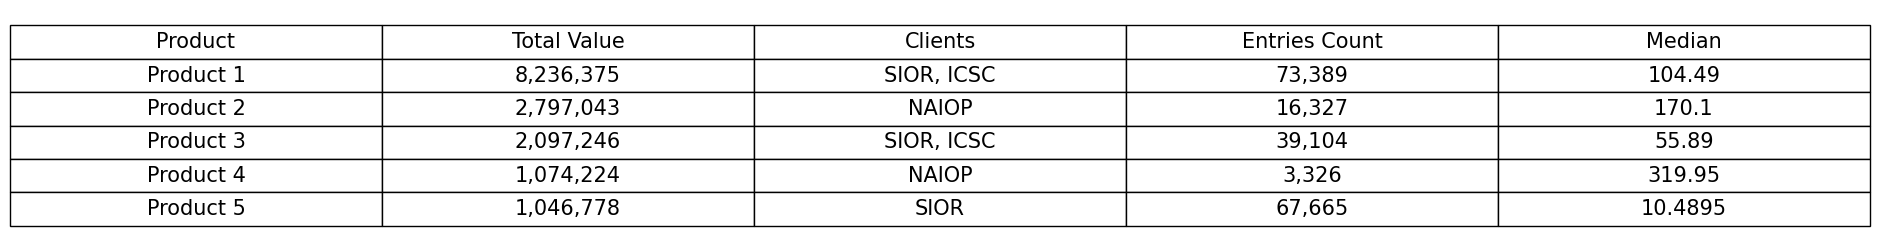

In [82]:
import matplotlib.pyplot as plt

# Manually putting in the data
table_data = [
    ["Product", "Total Value", "Clients", "Entries Count", "Median"],
    ["Product 1", "8,236,375", "SIOR, ICSC", "73,389", "104.49"],
    ["Product 2", "2,797,043", "NAIOP", "16,327", "170.1"],
    ["Product 3", "2,097,246", "SIOR, ICSC", "39,104", "55.89"],
    ["Product 4", "1,074,224", "NAIOP", "3,326", "319.95"],
    ["Product 5", "1,046,778", "SIOR", "67,665", "10.4895"]
]

# Creating the plot and axis
fig, ax = plt.subplots(figsize=(12, 3))  # Adjust the size as needed
ax.axis('tight')
ax.axis('off')

# Creating the table
table = ax.table(cellText=table_data, cellLoc='center', loc='center', colWidths=[0.2 for x in table_data[0]])
table.auto_set_font_size(False)
table.set_fontsize(15)
table.scale(2, 2)
plt.show()